# Linear Regression


Diese Lektion soll einen umfassenden Überblick über die lineare Regression geben und zeigen, wie man sie in Python einsetzt.

# Linear Regression Basics


Die lineare Regression ist eine prädiktive Modellierungstechnik zur Vorhersage einer numerischen Antwortvariablen auf der Grundlage einer oder mehrerer erklärender Variablen. Der Begriff „Regression“ in der prädiktiven Modellierung bezieht sich im Allgemeinen auf jede Modellierungsaufgabe, die die Vorhersage einer realen Zahl beinhaltet (im Gegensatz zur Klassifizierung, die die Vorhersage einer Kategorie oder Klasse beinhaltet). Der Begriff „linear“ in der Bezeichnung lineare Regression bezieht sich auf die Tatsache, dass die Methode Daten mit einer linearen Kombination der erklärenden Variablen modelliert. Eine Linearkombination ist ein Ausdruck, bei dem eine oder mehrere Variablen durch einen konstanten Faktor skaliert und addiert werden. Im Falle einer linearen Regression mit einer einzigen erklärenden Variable kann die in der linearen Regression verwendete Linearkombination wie folgt ausgedrückt werden:
Antwort = Achsenabschnitt + Konstante ∗ erklärende Variable
Die rechte Seite der Gleichung definiert eine Linie mit einem bestimmten y-Achsenabschnitt und einer Steigung mal der erklärenden Variable. Mit anderen Worten: Die lineare Regression in ihrer einfachsten Form passt eine gerade Linie an die Antwortvariable an. Das Modell ist so konzipiert, dass es eine Linie anpasst, die die quadrierten Differenzen (auch Fehler oder Residuen genannt) minimiert. Wir werden nicht näher darauf eingehen, wie das Modell die quadrierten Fehler tatsächlich minimiert, aber das Endergebnis ist eine Linie, die die Daten am besten anpasst. Da die lineare Regression die Daten mit einer Linie anpasst, ist sie am effektivsten in Fällen, in denen die Antwort und die erklärende Variable eine lineare Beziehung aufweisen.
Schauen wir uns noch einmal den mtcars-Datensatz an und verwenden wir die lineare Regression, um den Benzinverbrauch des Fahrzeugs auf der Grundlage des Fahrzeuggewichts vorherzusagen. Laden wir zunächst einige Bibliotheken und sehen wir uns ein Streudiagramm von Gewicht und Benzinverbrauch an, um einen Eindruck von der Form der Daten zu bekommen:

In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

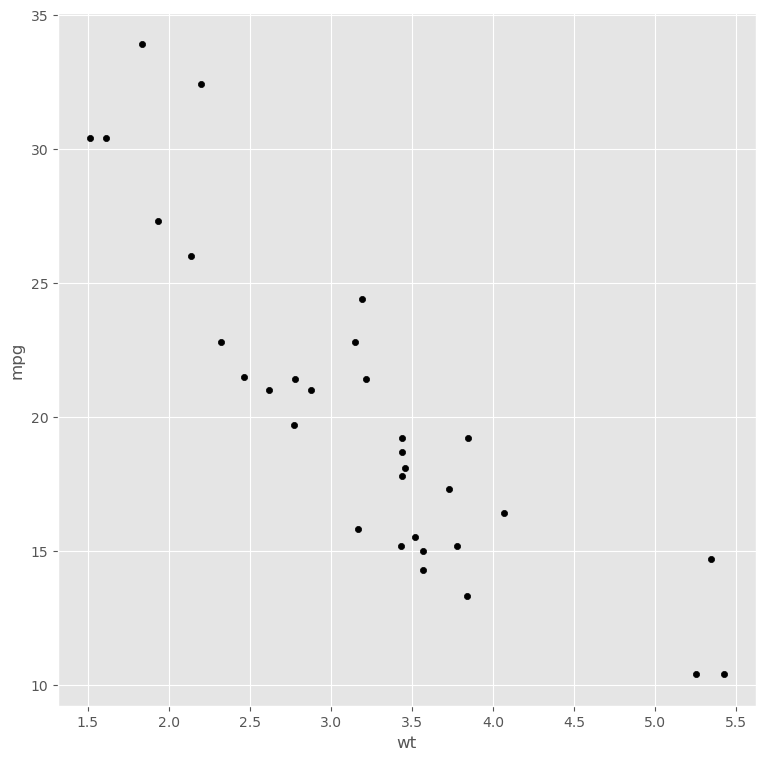

In [26]:
# Load mtcars data set
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

Das Streudiagramm zeigt eine annähernd lineare Beziehung zwischen Gewicht und Benzinverbrauch, was darauf hindeutet, dass ein lineares Regressionsmodell gut funktionieren könnte.
Die scikit-learn-Bibliothek von Python enthält eine breite Palette von Funktionen für die Vorhersagemodellierung. Wir laden die Trainingsfunktion für lineare Regression und passen eine Linie an die mtcars-Daten an:

In [27]:
from sklearn import linear_model

In [28]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


Die obige Ausgabe zeigt den Modellschnittpunkt und die Koeffizienten, die zur Erstellung der besten Anpassungslinie verwendet wurden. In diesem Fall ist der y-Achsenabschnitt auf 37,2851 gesetzt und der Koeffizient für die Gewichtsvariable ist -5,3445. Mit anderen Worten, das Modell passt sich an die Linie an: mpg = 37,2851 - 5,3445 * Gewicht.
Mit Hilfe der Funktion model.score() können wir einen Eindruck davon gewinnen, wie viel der Varianz in der Antwortvariablen durch das Modell erklärt wird:

In [29]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

Die Ausgabe der Score-Funktion für die lineare Regression ist „R-Quadrat“, ein Wert zwischen 0 und 1, der den Anteil der Varianz in der Antwortvariablen beschreibt, der durch das Modell erklärt wird. In diesem Fall erklärt das Fahrzeuggewicht etwa 75 % der Varianz des Benzinverbrauchs.
Das Maß R-Quadrat basiert auf den Residuen: Differenzen zwischen dem, was das Modell für jeden Datenpunkt vorhersagt, und dem tatsächlichen Wert jedes Datenpunktes. Wir können die Residuen des Modells extrahieren, indem wir eine Vorhersage mit dem Modell auf den Daten machen und dann den tatsächlichen Wert von jeder Vorhersage subtrahieren:

In [30]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-Quadrat wird berechnet als 1 - (SSResiduals/SSTotal), wobei SSResiduals die Summe der Quadrate der Modellresiduen und SSTotal die Summe der Quadrate der Differenz zwischen jedem Datenpunkt und dem Mittelwert der Daten ist. Wir könnten R-Quadrat von Hand wie folgt berechnen:

In [31]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

Da wir nun ein lineares Modell haben, können wir die Linie, an die es passt, in unser Streudiagramm einzeichnen, um ein Gefühl dafür zu bekommen, wie gut es zu den Daten passt:

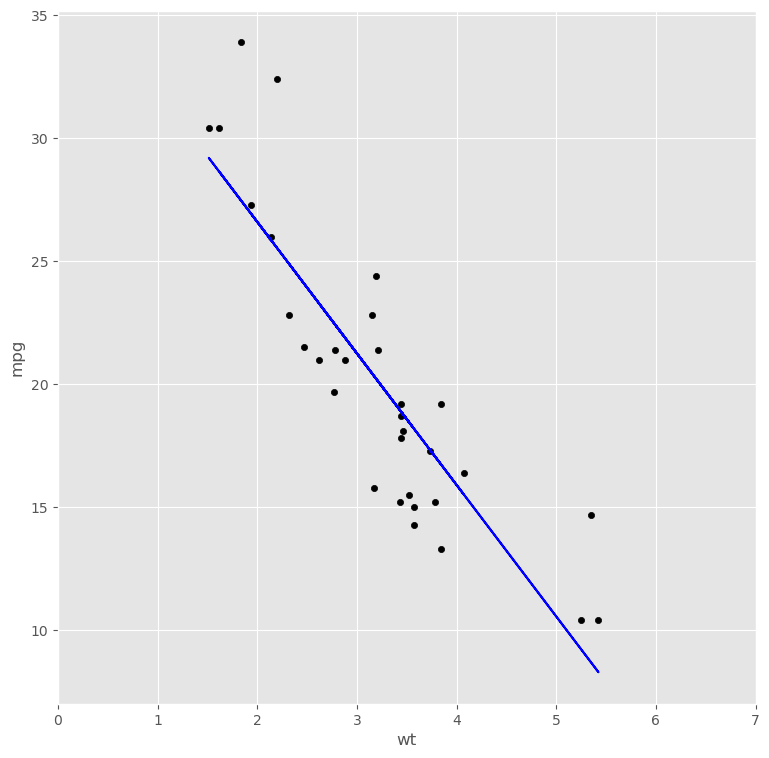

In [32]:

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"].values,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

Die Regressionslinie sieht nach einer vernünftigen Anpassung aus und entspricht unserer Intuition: Mit zunehmendem Gewicht des Fahrzeugs würden wir erwarten, dass der Kraftstoffverbrauch sinkt.
Ausreißer können einen großen Einfluss auf lineare Regressionsmodelle haben: Da es bei der Regression darum geht, die quadrierten Residuen zu minimieren, haben große Residuen einen unverhältnismäßig großen Einfluss auf das Modell. Die grafische Darstellung des Ergebnisses hilft uns, einflussreiche Ausreißer zu erkennen. In diesem Fall scheint es keine einflussreichen Ausreißer zu geben. Fügen wir einen Ausreißer hinzu - ein superschweres, kraftstoffsparendes Auto - und zeichnen ein neues Regressionsmodell:

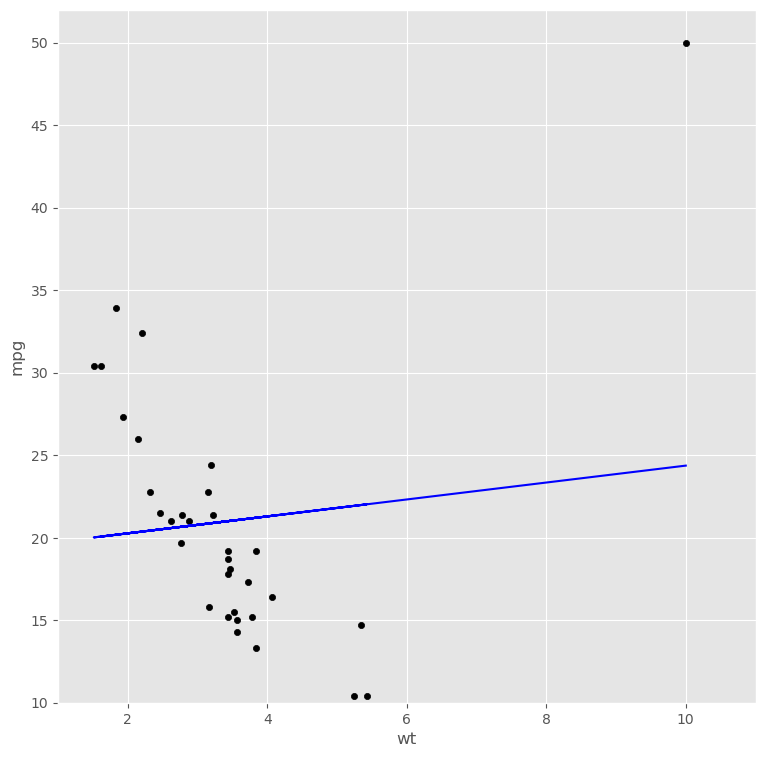

In [33]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = pd.concat([mtcars_subset, super_car])

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"].values,     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

Obwohl es sich hier um einen extremen, konstruierten Fall handelt, veranschaulicht das obige Diagramm, wie viel Einfluss ein einzelner Ausreißer auf ein lineares Regressionsmodell haben kann.
In einem gut funktionierenden linearen Regressionsmodell sollten die Residuen in etwa normalverteilt sein. Das heißt, wir wünschen uns eine annähernd gleichmäßige Verteilung der Fehler oberhalb und unterhalb der Regressionslinie. Wir können die Normalität der Residuen mit einem Q-Q-Diagramm (Quantil-Quantil) untersuchen. Erstellen Sie einen qqplot, indem Sie die Residuen an die Funktion stats.probplot() aus der Bibliothek scipy.stats übergeben:

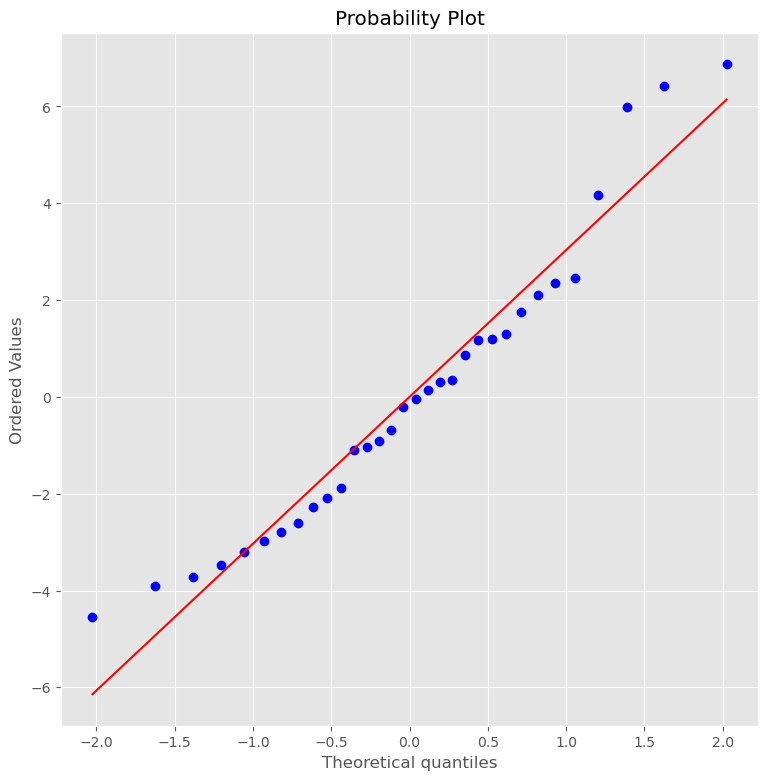

In [34]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

Wenn die Residuen normalverteilt sind, neigen sie dazu, entlang der geraden Linie auf dem Q-Q-Diagramm zu liegen. In diesem Fall scheinen die Residuen einem leicht nicht-linearen Muster zu folgen: Die Residuen sind an beiden Enden ein wenig von der Normalitätslinie weggekrümmt. Dies ist ein Hinweis darauf, dass eine einfache gerade Linie möglicherweise nicht ausreicht, um die Beziehung zwischen Gewicht und Benzinverbrauch vollständig zu beschreiben.
Nach der Erstellung von Modellvorhersagen ist es nützlich, eine Art von Metrik zu haben, um zu bewerten, wie gut das Modell funktioniert. Das bereinigte R-Quadrat ist ein nützliches Maß, aber es gilt nur für das Regressionsmodell selbst: Wir möchten eine universelle Bewertungsmetrik, mit der wir die Leistung verschiedener Modelltypen vergleichen können. Der mittlere quadratische Fehler (Root Mean Squared Error, RMSE) ist eine gängige Bewertungskennzahl für Vorhersagen, die reelle Zahlen beinhalten. Der mittlere quadratische Wurzelfehler ist die Quadratwurzel aus dem Durchschnitt der quadratischen Fehler (Residuen).

In [35]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])

2.949162685955028

Anstatt eine eigene RMSE-Funktion zu definieren, können Sie die mittlere quadratische Fehlerfunktion der scikit-learn-Bibliothek verwenden und die Quadratwurzel des Ergebnisses ziehen:

In [36]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

# Polynomial Regression

Variablen weisen oft nichtlineare Beziehungen auf, die sich nicht gut mit einer geraden Linie abbilden lassen. In diesen Fällen können wir die lineare Regression verwenden, um eine gekrümmte Linie an die Daten anzupassen, indem wir zusätzliche Terme höherer Ordnung (quadratisch, kubisch usw.) zum Modell hinzufügen. Eine lineare Regression, die Terme höherer Ordnung enthält, wird als „polynomiale Regression“ bezeichnet.

In [37]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model Accuracy:")
print(poly_model.score(X = predictors, 
                 y = mtcars["mpg"]))

Model intercept
49.93081094945181
Model Coefficients
[-13.38033708   1.17108689]
Model Accuracy:
0.8190613581384094


Die Ausgabe zeigt uns, dass die Aufnahme des Terms Gewicht im Quadrat die Leistung des Modells zu verbessern scheint, da das R-Quadrat von 0,75 auf 0,8190 anstieg. Es ist jedoch zu beachten, dass das Hinzufügen weiterer Variablen zu einem linearen Regressionsmodell niemals zu einer Verringerung von R-Quadrat führen kann, so dass wir nur dann Variablen hinzufügen sollten, wenn sich die Leistung wesentlich verbessert.
Zeichnen wir die gekrümmte Linie, die durch das neue Modell definiert wird, um zu sehen, ob die Anpassung besser ist als die des alten Modells. Zunächst erstellen wir eine Funktion, die ein Array von X-Werten, Modellkoeffizienten und einem Achsenabschnitt aufnimmt und die X-Werte und angepassten Y-Werte zurückgibt, die diesen X-Werten entsprechen.

/home/rainersawitzki/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


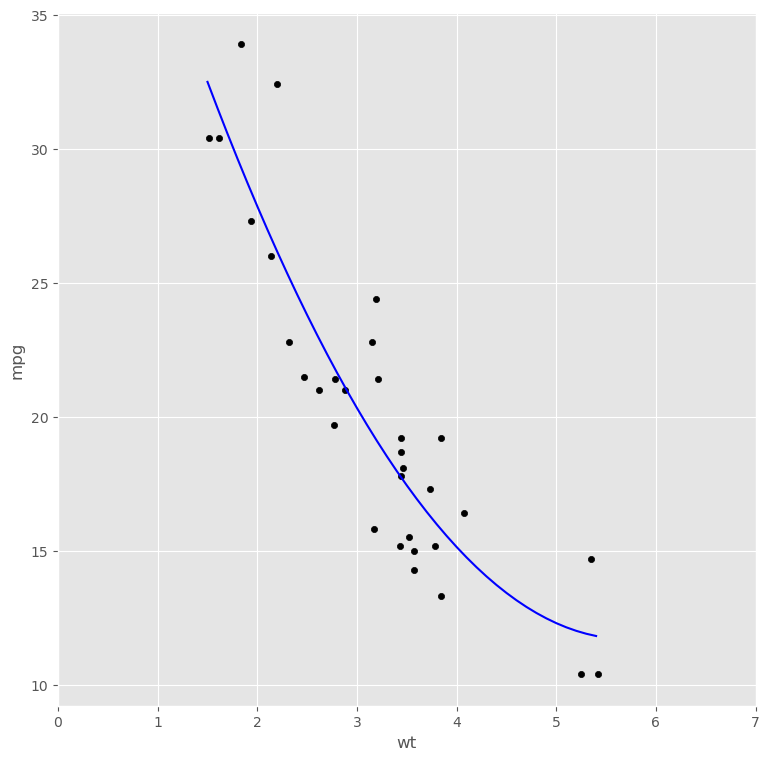

In [38]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

Die quadratische Funktion scheint den Daten ein wenig besser zu entsprechen als die lineare Funktion. Untersuchen wir weiter, indem wir das neue Modell verwenden, um Vorhersagen für die ursprünglichen Daten zu treffen und den mittleren quadratischen Fehler zu überprüfen:

In [39]:
preds = poly_model.predict(X=predictors)

rmse(preds , mtcars["mpg"])

2.5233004724610795

Da der RMSE des quadratischen Modells niedriger ist als der des alten und das bereinigte R-Quadrat höher ist, ist es wahrscheinlich ein besseres Modell. Allerdings müssen wir uns vor einer Überanpassung der Trainingsdaten hüten.
Eine Überanpassung liegt dann vor, wenn unser Modell zu gut zu den Daten passt, die wir für seine Erstellung verwendet haben (Trainingsdaten), was zu einer schlechten Generalisierung auf neue Daten führt. Dies ist der Grund, warum wir in der Regel keine Trainingsdaten zur Bewertung eines Modells verwenden wollen: Sie geben uns eine voreingenommene, normalerweise zu optimistische Bewertung. Eine der Stärken der linearen Regression erster und zweiter Ordnung ist, dass sie so einfach sind, dass eine Überanpassung der Daten sehr unwahrscheinlich ist. Je komplexer das von uns erstellte Modell ist und je mehr Spielraum es bei der Anpassung an die Trainingsdaten hat, desto größer ist das Risiko einer Überanpassung. Wir könnten beispielsweise immer mehr polynomiale Terme in unser Regressionsmodell aufnehmen, um eine bessere Anpassung an die Trainingsdaten und niedrigere RMSE-Werte für den Trainingssatz zu erreichen, aber dies würde mit Sicherheit nicht gut auf neue Daten verallgemeinert. Um dies zu veranschaulichen, passen wir ein Modell 10. Ordnung an die mtcars-Daten an:

In [40]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.119303392283
Model Coefficients
[ 6.45813540e+04 -1.20086129e+05  1.26931926e+05 -8.46598445e+04
  3.73155195e+04 -1.10334754e+04  2.16590403e+03 -2.70730543e+02
  1.94974161e+01 -6.15515433e-01]


0.8702106576290907

Beachten Sie, dass sich das R-Quadrat im Vergleich zu unserem quadratischen Modell deutlich erhöht hat. Stellen wir die beste Anpassungslinie dar, um zu untersuchen, was das Modell tut:

/home/rainersawitzki/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


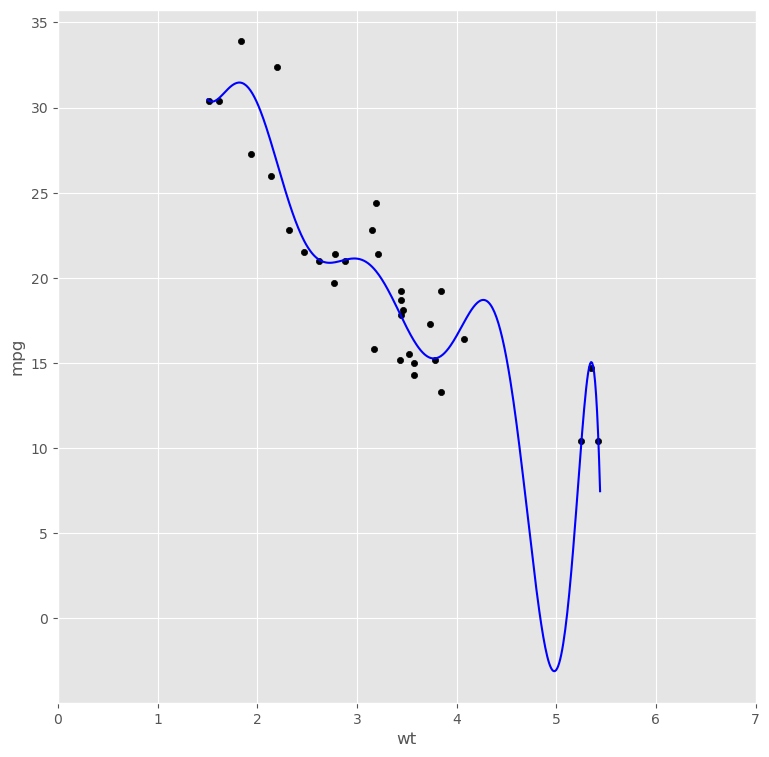

In [41]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

Beachten Sie, wie sich das Polynommodell 10. Ordnung an einigen Stellen stark krümmt, um sich den Trainingsdaten anzupassen. Dieses Modell passt zwar besser zu den Trainingsdaten, lässt sich aber mit ziemlicher Sicherheit nicht gut auf neue Daten verallgemeinern, da es zu absurden Vorhersagen führt, z. B. dass ein Auto weniger als 0 mpg hat, wenn es 5000 lbs wiegt.

# Multiple Linear Regression

Bei einer prädiktiven Modellierungsaufgabe haben Sie oft mehrere Variablen in Ihren Daten, die zur Erklärung der Variation in der Antwortvariablen beitragen können. Sie können weitere erklärende Variablen in ein lineares Regressionsmodell aufnehmen, indem Sie weitere Spalten in den Datenrahmen einfügen, den Sie an die Modelltrainingsfunktion übergeben. Lassen Sie uns ein neues Modell erstellen, das die PS-Variable zu unserem ursprünglichen Modell hinzufügt:

In [42]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.loc[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.227270116447215
[-3.87783074 -0.03177295]


0.8267854518827914

Das verbesserte R-Quadrat deutet darauf hin, dass die PS-Leistung in einem linearen Verhältnis zum Benzinverbrauch steht. Untersuchen wir das anhand einer Grafik:

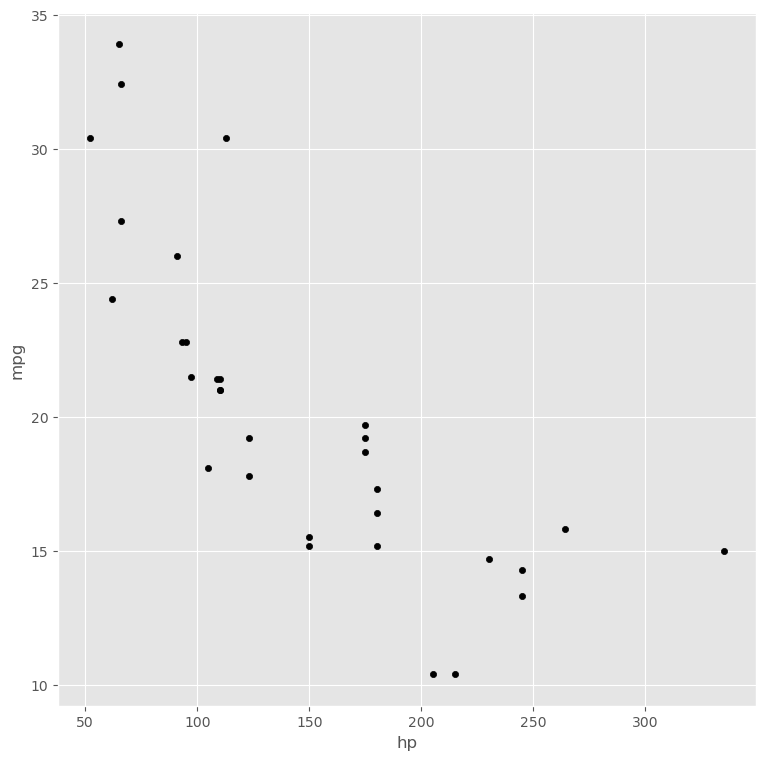

In [43]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black");

Zwar sinkt der Benzinverbrauch tendenziell mit der Leistung, doch scheint die Beziehung eher gekrümmt als linear zu sein, so dass das Hinzufügen von polynomialen Termen zu unserem multiplen Regressionsmodell zu einer besseren Anpassung führen könnte:

In [44]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

# Check R-squared
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670643
RMSE
1.9609108134176978


Das neue R-Quadrat und der niedrigere RMSE deuten darauf hin, dass es sich um ein besseres Modell handelt als die zuvor erstellten Modelle, und wir würden uns keine allzu großen Sorgen über eine Überanpassung machen, da es nur 2 Variablen und 2 quadratische Terme enthält. Beachten Sie, dass es bei der Arbeit mit mehrdimensionalen Modellen schwierig wird, die Ergebnisse zu visualisieren, so dass Sie sich stark auf die numerische Ausgabe verlassen.
Wir könnten weiterhin weitere erklärende Variablen hinzufügen, um das Modell zu verbessern. Die Hinzufügung von Variablen, die nur in geringem Maße mit der Antwort zusammenhängen, oder die Einbeziehung von Variablen, die zu eng miteinander verbunden sind, kann sich bei der linearen Regression negativ auf Ihre Ergebnisse auswirken. Sie sollten sich auch vor numerischen Variablen in Acht nehmen, die nur wenige eindeutige Werte annehmen, da sie sich eher wie kategorische als numerische Variablen verhalten können.

# Wrap Up

Die lineare Regression ist eine der gebräuchlichsten Techniken, um aus Daten echte numerische Vorhersagen zu machen. Sie ist immer dann ein guter Ausgangspunkt, wenn Sie eine numerische Vorhersage machen müssen. Beim nächsten Mal werden wir uns erneut mit dem titanischen Überlebensdatensatz befassen und uns auf die Klassifizierung konzentrieren: die Zuordnung von Beobachtungen zu Kategorien.